# <center><span style='color:Green'>Melanoma Detection Assignment</span></center>

### Problem statement

To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution that can evaluate images and alert dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Libraries and Packages

In [ ]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
# Import necessary layers from Keras
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from glob import glob
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [ ]:
# Importing the drive module from the google.colab package
from google.colab import drive

# Mounting Google Drive to the Colab environment
# This prompts you to authenticate and authorize access to your Google Drive
# Once authorized, your Google Drive will be mounted at the specified location
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [ ]:
# Importing the drive module from the google.colab package
from google.colab import drive

# Mounting Google Drive to the Colab environment
# This command will prompt you to authenticate and authorize access to your Google Drive.
# After authorization, your Google Drive will be mounted at the specified location,
# in this case, it's mounted at '/content/drive'.
drive.mount('/content/drive')


Mounted at /content/drive


**Objectives**: Developing a TensorFlow-based custom convolutional neural network for multiclass classification

**Data Summary:**

The dataset consists of 2357 images of malignant and benign oncological diseases, which were formed from the International Skin Imaging Collaboration (ISIC). All images were sorted according to the classification taken with ISIC, and all subsets were divided into the same number of images, with the exception of melanomas and moles, whose images are slightly dominant.

The data set contains the following diseases:
1. Actinic keratosis
2. Basal cell carcinoma
3. Dermatofibroma
4. Melanoma
5. Nevus
6. Pigmented benign keratosis
7. Seborrheic keratosis
8. Squamous cell carcinoma
9. Vascular lesion
 

Defining the path for the training and testing images

In [ ]:

# The path to the training dataset is specified here
# Update this path according to the location of your training images
data_dir_train = pathlib.Path("/content/drive/MyDrive/SkinCancerDetection/Train")

# The path to the testing dataset is specified here
# Update this path according to the location of your testing images
data_dir_test = pathlib.Path('/content/drive/MyDrive/SkinCancerDetection/Test')

In [ ]:
# Counting the number of images in the training dataset
# The glob() function is used to search for files matching a specified pattern
# In this case, it searches for all files with the .jpg extension in all subdirectories of data_dir_train
# The len() function is then used to count the number of files found
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))

# Printing the total number of images in the training dataset
print(image_count_train)

# Counting the number of images in the testing dataset
# Similar to the previous step, the glob() function is used to search for .jpg files in all subdirectories of data_dir_test
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))

# Printing the total number of images in the testing dataset
print(image_count_test)


2239
118


### Load using keras.preprocessing

We'll utilize the convenient image_dataset_from_directory utility to load these images directly from disk.

### Create a dataset

Specify loader parameters:

In [ ]:
# Setting the batch size for training
# The batch size determines the number of samples to be used in each training iteration
# A larger batch size can lead to faster training but requires more memory
# A smaller batch size consumes less memory but may result in slower training
batch_size = 32

# Defining the height of input images
# This specifies the height of the images that will be fed into the model
# Standardizing the input image size is important for consistency in training
# A common practice is to resize all images to a specific height and width
img_height = 180

# Defining the width of input images
# Similar to img_height, this specifies the width of the images that will be fed into the model
# Standardizing the input image size helps the model learn features effectively
img_width = 180


### Use 80% of the images for training, and 20% for validation.

##### Creating a training dataset using the image_dataset_from_directory utility

In [ ]:
# This utility function is provided by TensorFlow Keras to load images from a directory structure
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,             # Path to the directory containing the training images
    seed=123,                   # Seed for random shuffling of the dataset
    validation_split=0.2,       # Percentage of the dataset to use for validation
    subset='training',          # Specifies that this dataset is for training
    image_size=(img_height, img_width),  # Dimensions to resize the images to
    batch_size=batch_size       # Number of images to include in each batch
)



##### Defining validation dataset below.

In [ ]:

# Creating a validation dataset using the image_dataset_from_directory utility
# This utility function is provided by TensorFlow Keras to load images from a directory structure
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,             # Path to the directory containing the training images
    seed=123,                   # Seed for random shuffling of the dataset
    validation_split=0.2,       # Percentage of the dataset to use for validation
    subset='validation',        # Specifies that this dataset is for validation
    image_size=(img_height, img_width),  # Dimensions to resize the images to
    batch_size=batch_size       # Number of images to include in each batch
)


Found 2239 files belonging to 9 classes.
Using 447 files for validation.


#### Note: for both training and validation 
 1. Ensure to employ a seed value of 123 when generating your dataset with tf.keras.preprocessing.image_dataset_from_directory
 2. Be sure to resize your images to dimensions of img_height x img_width when creating the dataset

In [ ]:
# List out all the classes of skin cancer and store them in a list.
# You can find the class names in the class_names attribute on these datasets.
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names

# Print the list of class names
print(class_names)

### Visualize the data
#### Write a code to visualize a single instance from each of the nine classes within the dataset.

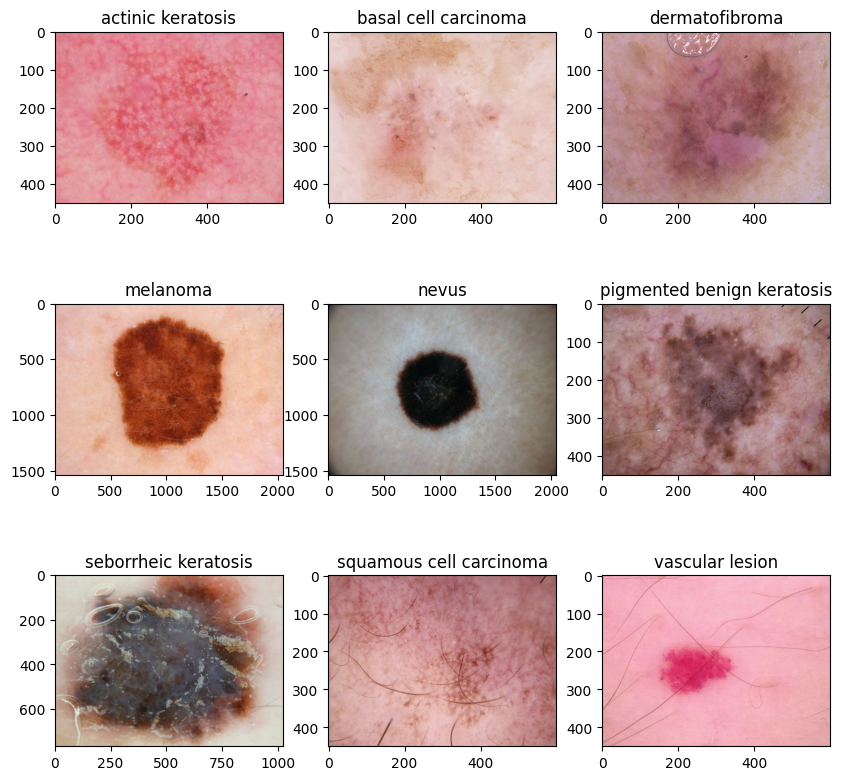

In [ ]:
# Create a new figure for plotting with a size of 10x10 inches
plt.figure(figsize=(10, 10))

# Iterate over each of the nine classes
for i in range(9):
    # Get file paths for images in the current class directory
    image_paths = list(data_dir_train.glob(class_names[i] + '/*.jpg'))
    
    # Check if there are at least two images available for the current class
    if len(image_paths) >= 2:
        # Load the second image from the current class directory
        # The image is loaded using plt.imread() and converted to a string for file path access
        image = plt.imread(str(image_paths[1]))
        
        # Add a subplot to the current figure grid, arranged in a 3x3 layout
        plt.subplot(3, 3, i + 1)
        
        # Set the title of the subplot to the name of the current class
        plt.title(class_names[i])
        
        # Display the image on the subplot
        plt.imshow(image)
    
# Adjust layout to prevent overlapping
plt.tight_layout()
# Show the plot
plt.show()


The `image_batch` tensor has dimensions `(32, 180, 180, 3)`, representing a batch of 32 images with dimensions of `180x180x3` (where the last dimension denotes the RGB color channels). Conversely, the `label_batch` tensor has dimensions `(32,)`, containing the corresponding labels for the 32 images.

`Dataset.cache()` retains the images in memory once they are loaded from disk during the initial epoch

`Dataset.prefetch()` concurrently performs data preprocessing and model execution during training

In [ ]:
# Enable automatic optimization of resource usage for data loading
AUTOTUNE = tf.data.experimental.AUTOTUNE

# Cache the training dataset in memory after the first epoch
# This improves training performance by avoiding re-loading of images from disk
# during subsequent epochs
train_ds = train_ds.cache()

# Shuffle the training dataset with a buffer size of 1000
# This helps to randomize the order of samples in each epoch
train_ds = train_ds.shuffle(1000)

# Prefetch batches of data during training
# This overlaps data preprocessing and model execution, optimizing performance
# by reducing idle time during training
train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)

# Cache the validation dataset in memory
# This improves performance during validation by avoiding re-loading of images
# from disk for each validation step
val_ds = val_ds.cache()

# Prefetch batches of data during validation
# Similar to the training dataset, this overlaps data preprocessing and model execution
# for faster validation
val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)


### Build the model

##### Develop a CNN model capable of accurately identifying the 9 classes within the dataset. Employ ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values to the `(0,1)` range. Given that RGB channel values typically span the `[0, 255]` range, standardizing them to `[0, 1]` enhances neural network performance

In [ ]:
### Your code goes here
# Define the number of classes
num_classes = 9

# Create a Sequential model
model = Sequential([
    # Rescale pixel values to the range [0,1]
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))
])

# Add a convolutional layer with 32 filters, each with a 5x5 kernel size, ReLU activation, and 'same' padding
model.add(Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='relu', input_shape=(180, 180, 32)))

# Add another convolutional layer with similar configuration
model.add(Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='relu'))

# Add a max pooling layer with a pool size of 2x2
model.add(MaxPool2D(pool_size=(2,2)))

# Add more convolutional and max pooling layers, gradually increasing the number of filters
model.add(Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(5,5), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(5,5), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

# Add a dropout layer with a dropout rate of 25%
model.add(Dropout(0.25))

# Flatten the output from the convolutional layers
model.add(Flatten())

# Add a fully connected dense layer with softmax activation for classification
model.add(Dense(num_classes, activation='softmax'))


### Compile the model

##### Select a suitable optimizer and loss function for model training

In [ ]:
# Compile the model with the specified optimizer, loss function, and evaluation metrics
model.compile(
    optimizer='adam',  # Use the Adam optimizer for training
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),  # Use Sparse Categorical Crossentropy loss
    metrics=['accuracy']  # Track accuracy metric during training
)

In [ ]:
# View the summary of all layers in the model
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_4 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_18 (Conv2D)          (None, 180, 180, 32)      2432      
                                                                 
 conv2d_19 (Conv2D)          (None, 180, 180, 32)      25632     
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 90, 90, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_20 (Conv2D)          (None, 90, 90, 32)        25632     
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 45, 45, 32)        0         
 ng2D)                                                

### Train the model

In [ ]:
# Set the number of epochs for training
epochs = 30

# Train the model using the training dataset and validate it using the validation dataset
# The fit() method fits the model to the training data for a fixed number of epochs
# It also evaluates the model on the validation data after each epoch
history = model.fit(
    train_ds,          # Training dataset
    validation_data=val_ds,   # Validation dataset
    epochs=epochs      # Number of epochs for training
)

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


56/56 [==============================] - 26s 170ms/step - loss: 2.0489 - accuracy: 0.1819 - val_loss: 2.0343 - val_accuracy: 0.2215
Epoch 2/30
56/56 [==============================] - 5s 93ms/step - loss: 2.0228 - accuracy: 0.2009 - val_loss: 2.0031 - val_accuracy: 0.2192
Epoch 3/30
56/56 [==============================] - 5s 89ms/step - loss: 1.9606 - accuracy: 0.2411 - val_loss: 1.8769 - val_accuracy: 0.2998
Epoch 4/30
56/56 [==============================] - 5s 90ms/step - loss: 1.8900 - accuracy: 0.2835 - val_loss: 1.8074 - val_accuracy: 0.3311
Epoch 5/30
56/56 [==============================] - 5s 88ms/step - loss: 1.9844 - accuracy: 0.2556 - val_loss: 1.9368 - val_accuracy: 0.2483
Epoch 6/30
56/56 [==============================] - 5s 88ms/step - loss: 1.9219 - accuracy: 0.2617 - val_loss: 1.8653 - val_accuracy: 0.2550
Epoch 7/30
56/56 [==============================] - 5s 88ms/step - loss: 1.8759 - accuracy: 0.2779 - val_loss: 1.8091 - val_accuracy: 0.3333
Epoch 8/30
56/56 [====

### Visualizing training outcomes

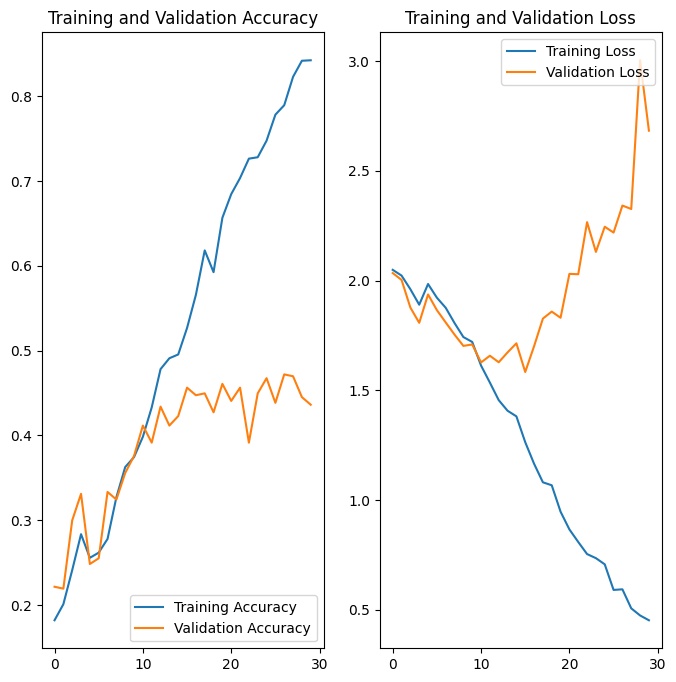

In [ ]:
# Extracting training and validation accuracy, and loss values from the history object
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Creating a range of epochs for plotting
epochs_range = range(epochs)

# Creating a new figure for plotting with a size of 8x8 inches
plt.figure(figsize=(8, 8))

# Subplot for plotting training and validation accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')  # Plotting training accuracy
plt.plot(epochs_range, val_acc, label='Validation Accuracy')  # Plotting validation accuracy
plt.legend(loc='lower right')  # Adding legend to the plot
plt.title('Training and Validation Accuracy')  # Adding title to the plot

# Subplot for plotting training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')  # Plotting training loss
plt.plot(epochs_range, val_loss, label='Validation Loss')  # Plotting validation loss
plt.legend(loc='upper right')  # Adding legend to the plot
plt.title('Training and Validation Loss')  # Adding title to the plot

# Displaying the plot
plt.show()

#### Analyze the results of model training to determine whether there are indications of overfit or underfit



**Initial insights from the base model**

- The model exhibits overfitting, evident from the discernible divergence between training and test loss functions, notably occurring around the 10th to 11th epoch.

- The accuracy hovers at approximately 75-80%, indicating that the model may possess sufficient capacity to memorize patterns from the dataset

- However, it's premature to draw conclusions regarding the presence of overfitting or underfitting at this stage



In [ ]:
# After analyzing the model fit history for presence of underfitting or overfitting,
# choose an appropriate data augmentation strategy.

# Define a Sequential model for data augmentation
data_augmentation = keras.Sequential([
    # Randomly flip images horizontally and vertically
    layers.experimental.preprocessing.RandomFlip(mode="horizontal_and_vertical", input_shape=(img_height,img_width,3)),
    # Randomly rotate images by a maximum of 20% (0.2 radians)
    layers.experimental.preprocessing.RandomRotation(0.2, fill_mode='reflect'),
    # Randomly zoom into images by factors ranging from 0.2 to 0.3
    layers.experimental.preprocessing.RandomZoom(height_factor=(0.2, 0.3), width_factor=(0.2, 0.3), fill_mode='reflect')
])


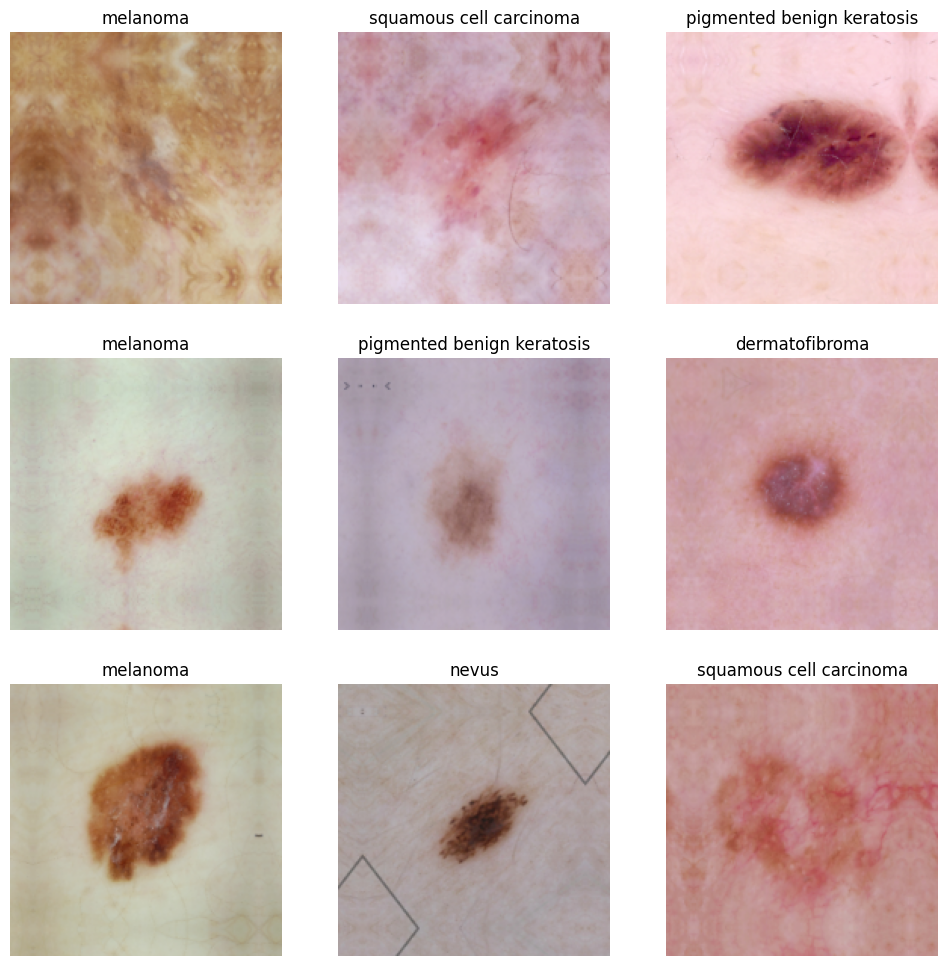

In [ ]:
# Visualize how the augmentation strategy works for one instance of a training image.

# Create a new figure for plotting with a size of 12x12 inches
plt.figure(figsize=(12, 12))

# Take one batch of images and labels from the training dataset
for images, labels in train_ds.take(1):
    # Iterate over the images in the batch
    for i in range(9):
        # Add a subplot to the figure grid, arranged in a 3x3 layout
        ax = plt.subplot(3, 3, i + 1)
        
        # Apply the data augmentation to the current image and plot it
        plt.imshow(data_augmentation(images)[i].numpy().astype("uint8"))
        
        # Set the title of the subplot to the corresponding class name
        plt.title(class_names[labels[i]])
        
        # Hide the axis labels
        plt.axis("off")


### Build, compile, and train the model


#### Build the model

In [ ]:
# You can use Dropout layer if there is evidence of overfitting in your findings

# Define the number of classes
num_classes = 9

# Create a Sequential model
model = Sequential([
    data_augmentation,  # Apply data augmentation strategy
    # Rescale pixel values to the range [0,1]
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))
])

# Add convolutional layers to extract features from the input images
model.add(Conv2D(filters=32, kernel_size=(5,5), padding='Same', activation='relu', input_shape=(180, 180, 32)))
model.add(Conv2D(filters=32, kernel_size=(5,5), padding='Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(5,5), padding='Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(5,5), padding='Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

# Add Dropout layer to mitigate overfitting
model.add(Dropout(0.25))

# Flatten the output from convolutional layers
model.add(Flatten())

# Add a fully connected dense layer with softmax activation for classification
model.add(Dense(num_classes, activation='softmax'))


#### Compile the model

In [ ]:
# Compile the model with specified optimizer, loss function, and evaluation metrics
model.compile(
    optimizer='adam',  # Use the Adam optimizer for training
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),  # Use Sparse Categorical Crossentropy loss
    metrics=['accuracy']  # Track accuracy metric during training
)

#### Training the model

In [ ]:
# Train the model for 20 epochs using the training dataset and validate it using the validation dataset

# Set the number of epochs for training
epochs = 30

# Train the model using the training dataset and validate it using the validation dataset
history = model.fit(
    train_ds,          # Training dataset
    validation_data=val_ds,   # Validation dataset
    epochs=epochs      # Number of epochs for training
)

Epoch 1/30
56/56 [==============================] - 8s 109ms/step - loss: 2.0530 - accuracy: 0.2182 - val_loss: 1.9639 - val_accuracy: 0.2371
Epoch 2/30
56/56 [==============================] - 6s 110ms/step - loss: 1.9410 - accuracy: 0.2600 - val_loss: 1.8294 - val_accuracy: 0.3199
Epoch 3/30
56/56 [==============================] - 6s 104ms/step - loss: 1.8506 - accuracy: 0.2963 - val_loss: 1.6541 - val_accuracy: 0.4004
Epoch 4/30
56/56 [==============================] - 6s 104ms/step - loss: 2.0621 - accuracy: 0.2009 - val_loss: 2.0245 - val_accuracy: 0.2036
Epoch 5/30
56/56 [==============================] - 6s 101ms/step - loss: 2.0073 - accuracy: 0.2031 - val_loss: 1.9106 - val_accuracy: 0.3020
Epoch 6/30
56/56 [==============================] - 6s 103ms/step - loss: 1.8657 - accuracy: 0.2974 - val_loss: 1.8617 - val_accuracy: 0.2573
Epoch 7/30
56/56 [==============================] - 6s 103ms/step - loss: 1.8151 - accuracy: 0.3030 - val_loss: 1.7374 - val_accuracy: 0.3289
Epoch 

### Visualizing the outcomes

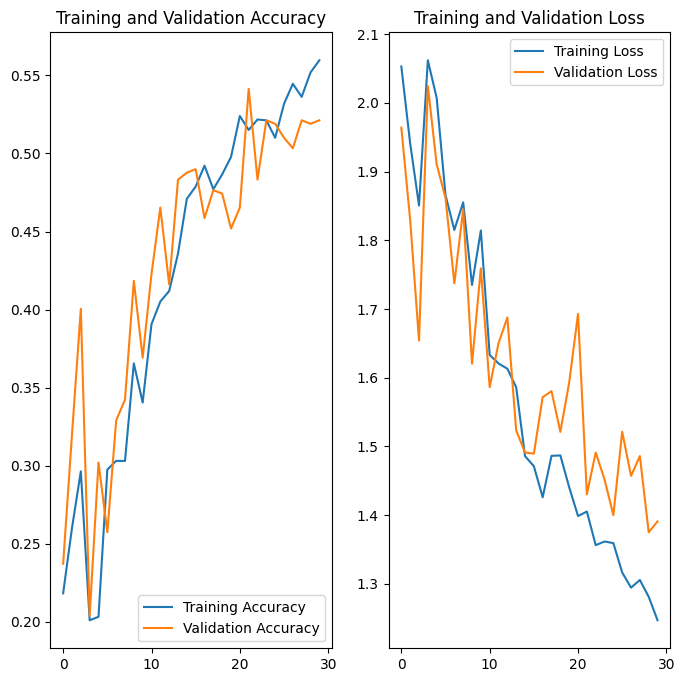

In [ ]:
# Extracting training and validation accuracy, and loss values from the history object
acc = history.history['accuracy']         # Training accuracy
val_acc = history.history['val_accuracy'] # Validation accuracy
loss = history.history['loss']             # Training loss
val_loss = history.history['val_loss']     # Validation loss

# Creating a range of epochs for plotting
epochs_range = range(epochs)

# Creating a new figure for plotting with a size of 8x8 inches
plt.figure(figsize=(8, 8))

# Subplot for plotting training and validation accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')     # Plotting training accuracy
plt.plot(epochs_range, val_acc, label='Validation Accuracy') # Plotting validation accuracy
plt.legend(loc='lower right')                               # Adding legend to the plot
plt.title('Training and Validation Accuracy')               # Adding title to the plot

# Subplot for plotting training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')     # Plotting training loss
plt.plot(epochs_range, val_loss, label='Validation Loss') # Plotting validation loss
plt.legend(loc='upper right')                            # Adding legend to the plot
plt.title('Training and Validation Loss')                # Adding title to the plot

# Displaying the plot
plt.show()

#### Analyze the results post-model fitting to ascertain any signs of overfitting or underfitting. Assess whether there is notable improvement compared to the previous model run

**Insights from the Second Model**

- While the accuracy remains unchanged, the introduction of data augmentation has effectively mitigated the overfitting issue

- We might consider increasing the number of epochs to enhance accuracy, hence it's premature to make a conclusive judgment

#### Determine the class distribution within the training dataset.
 **Context:** Real-world datasets often exhibit class imbalance, where certain classes may have significantly more samples than others. This class imbalance can adversely impact the quality of the final model. Therefore, it's crucial to perform a sanity check and examine the distribution of classes within the dataset

In [ ]:
# Initialize empty lists to store file paths and corresponding lesion labels
path_list = []     # List to store file paths
lesion_list = []   # List to store lesion labels

# Iterate over each class name
for i in class_names:
    # Iterate over each image file within the directory corresponding to the current class
    for j in data_dir_train.glob(i + '/*.jpg'):
        # Append the file path to the path list
        path_list.append(str(j))
        # Append the corresponding lesion label to the lesion list
        lesion_list.append(i)

# Create a dictionary where keys are file paths and values are lesion labels
dataframe_dict_original = dict(zip(path_list, lesion_list))

# Create a DataFrame using the dictionary, with columns 'Path' and 'Label'
original_df = pd.DataFrame(list(dataframe_dict_original.items()), columns=['Path', 'Label'])

# print 
original_df

,Path,Label
0,/content/drive/MyDrive/SkinCancerDetection/Tra...,actinic keratosis
1,/content/drive/MyDrive/SkinCancerDetection/Tra...,actinic keratosis
2,/content/drive/MyDrive/SkinCancerDetection/Tra...,actinic keratosis
3,/content/drive/MyDrive/SkinCancerDetection/Tra...,actinic keratosis
4,/content/drive/MyDrive/SkinCancerDetection/Tra...,actinic keratosis
...,...,...
2234,/content/drive/MyDrive/SkinCancerDetection/Tra...,vascular lesion
2235,/content/drive/MyDrive/SkinCancerDetection/Tra...,vascular lesion
2236,/content/drive/MyDrive/SkinCancerDetection/Tra...,vascular lesion
2237,/content/drive/MyDrive/SkinCancerDetection/Tra...,vascular lesion


In [ ]:
# Create a dictionary where keys are file paths and values are lesion labels
dataframe_dict_original = dict(zip(path_list, lesion_list))

# Create a DataFrame using the dictionary, with columns 'Path' and 'Label'
original_df = pd.DataFrame(list(dataframe_dict_original.items()), columns=['Path', 'Label'])

#print
original_df

,Path,Label
0,/content/drive/MyDrive/SkinCancerDetection/Tra...,actinic keratosis
1,/content/drive/MyDrive/SkinCancerDetection/Tra...,actinic keratosis
2,/content/drive/MyDrive/SkinCancerDetection/Tra...,actinic keratosis
3,/content/drive/MyDrive/SkinCancerDetection/Tra...,actinic keratosis
4,/content/drive/MyDrive/SkinCancerDetection/Tra...,actinic keratosis
...,...,...
2234,/content/drive/MyDrive/SkinCancerDetection/Tra...,vascular lesion
2235,/content/drive/MyDrive/SkinCancerDetection/Tra...,vascular lesion
2236,/content/drive/MyDrive/SkinCancerDetection/Tra...,vascular lesion
2237,/content/drive/MyDrive/SkinCancerDetection/Tra...,vascular lesion


<BarContainer object of 9 artists>

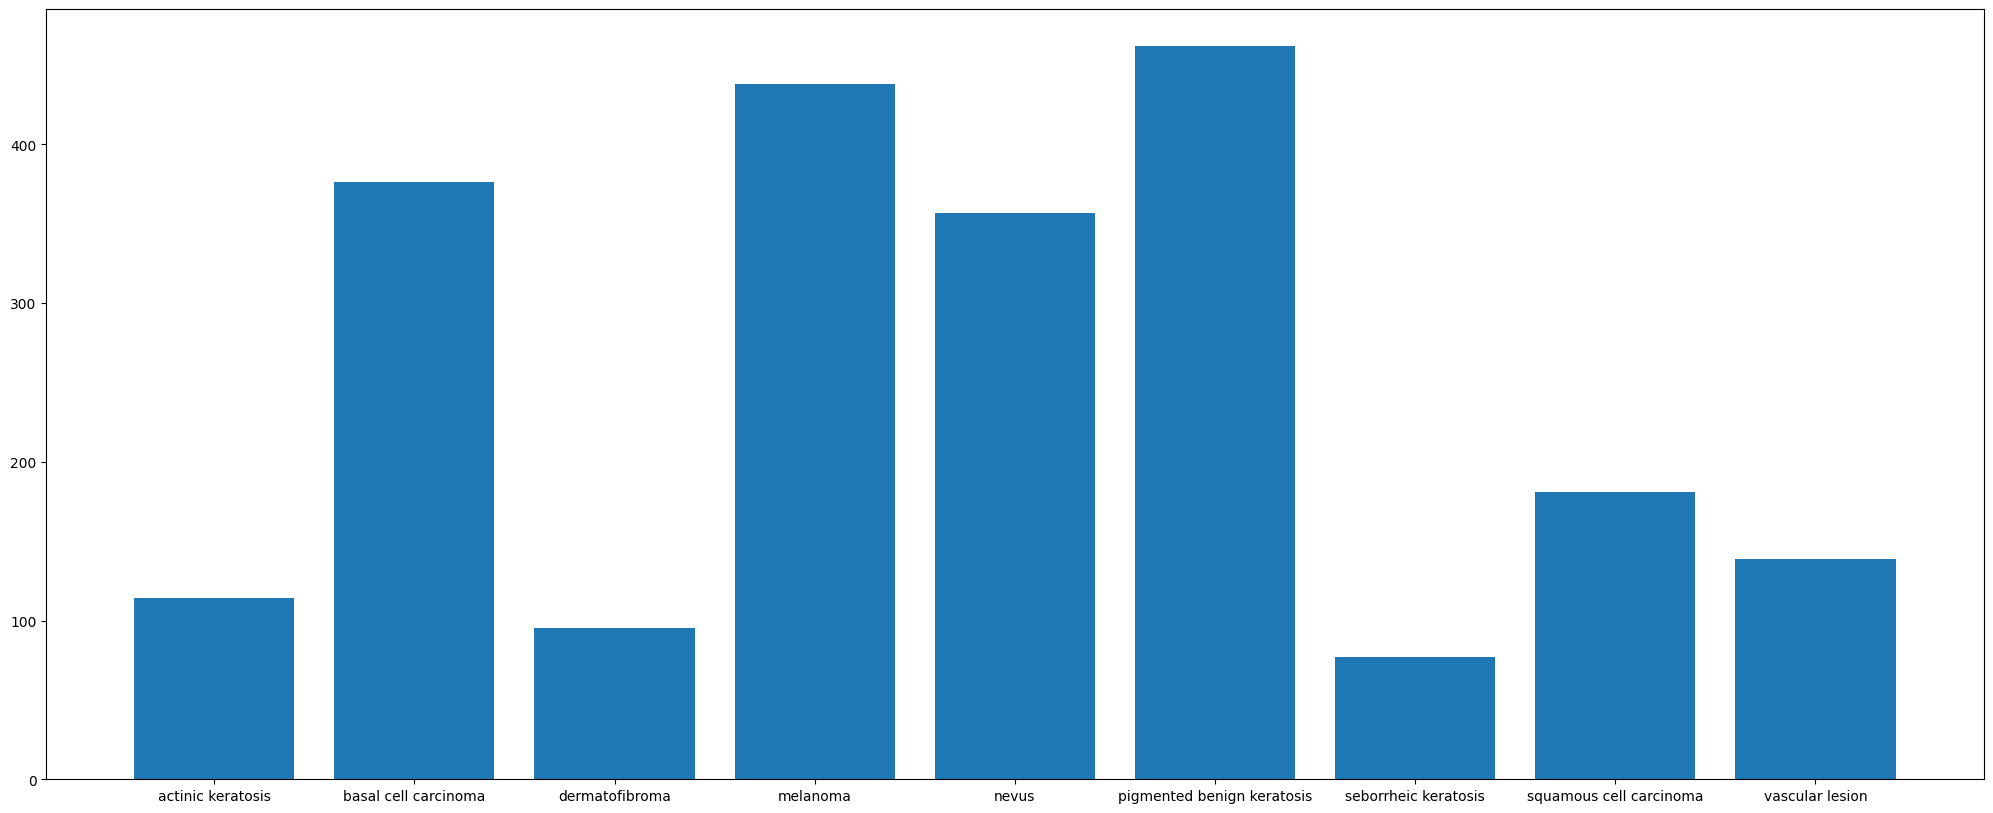

In [ ]:
# Initialize an empty list to store the count of images for each class
count = []

# Iterate over each class name
for i in class_names:
    # Count the number of images for the current class and append it to the count list
    count.append(len(list(data_dir_train.glob(i + '/*.jpg'))))

# Create a bar plot to visualize the distribution of images across classes
plt.figure(figsize=(25, 10))  # Set the size of the plot
plt.bar(class_names, count)   # Create a bar plot with class_names on x-axis and count on y-axis

#### Observations:

##### - Which class has the least number of samples?

##### **Ans.** seborrheic keratosis (77)

##### - Which classes dominate the data in terms proportionate number of samples?

##### **Ans.** actinic keratosis and dermatofibroma have proportionate number of classes. melanoma and pigmented benign keratosis have proprtionate number of classes


In [ ]:
# `class_names` represents a list of class names or labels
class_names

['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

#### Address the imbalance in class distribution

**Context:** You have the option to utilize the Python library `Augmentor` (accessible at https://augmentor.readthedocs.io/en/master/) to augment data across all classes, ensuring none of the classes possess an inadequate number of samples.

In [ ]:
# Install the Augmentor package using pip
!pip install Augmentor

The typical procedure for utilizing `Augmentor` is as follows:

1. Create an instance of a `Pipeline` object, specifying the directory where your original image dataset is located.<br>
2. Specify a set of transformations to apply to this dataset using your `Pipeline` object.<br>
3.  Trigger these transformations by invoking the `sample()` method of your `Pipeline` object.


In [ ]:
#path_to_training_dataset="/content/drive/MyDrive/SkinCancerDetection/Train"

# Iterate over each class name
for i in class_names:
    # Create a Pipeline object pointing to the directory containing the initial image dataset
    p = Augmentor.Pipeline("/content/drive/MyDrive/SkinCancerDetection/Train", save_format='jpg')
    
    # Define a rotation operation with a probability of 0.7 and maximum left/right rotation of 10 degrees
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    
    # Execute the defined operations by generating 500 augmented samples per class
    p.sample(500)  # We are adding 500 samples per class to ensure that none of the classes are sparse.


Initialised with 2239 image(s) found.
Output directory set to /content/drive/MyDrive/SkinCancerDetection/Train/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x78F299A93700>: 100%|██████████| 500/500 [00:58<00:00,  8.61 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/drive/MyDrive/SkinCancerDetection/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x78F29E64C790>: 100%|██████████| 500/500 [00:44<00:00, 11.25 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/drive/MyDrive/SkinCancerDetection/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x78F29A14EB00>: 100%|██████████| 500/500 [00:49<00:00, 10.09 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/drive/MyDrive/SkinCancerDetection/Train/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x78F29E052050>: 100%|██████████| 500/500 [00:42<00:00, 11.77 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/drive/MyDrive/SkinCancerDetection/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x78F29AA968F0>: 100%|██████████| 500/500 [00:43<00:00, 11.61 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/drive/MyDrive/SkinCancerDetection/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x78F29AAC1840>: 100%|██████████| 500/500 [00:43<00:00, 11.45 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/drive/MyDrive/SkinCancerDetection/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x78F29E28BA60>: 100%|██████████| 500/500 [00:43<00:00, 11.50 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/drive/MyDrive/SkinCancerDetection/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x78F29AA7B850>: 100%|██████████| 500/500 [00:40<00:00, 12.43 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/drive/MyDrive/SkinCancerDetection/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x78F299AC8CD0>: 100%|██████████| 500/500 [00:33<00:00, 15.04 Samples/s]


Augmentor has stored the augmented images within the output subdirectory of each respective subdirectory for the different types of skin cancer. Now, let's examine the total count of augmented images

In [ ]:
# Define the directory path for the augmented images
data_dir_train1 = pathlib.Path("/content/drive/MyDrive/SkinCancerDetection/Train/output")

# Count the number of augmented images by iterating over each subdirectory and counting the JPEG files
image_count_train1 = len(list(data_dir_train1.glob('*/*.jpg')))

# Print the total count of augmented images
print(image_count_train1)

4500


In [ ]:
# Iterate over each class name
for i in class_names:
    # Iterate over each augmented image file within the subdirectory corresponding to the current class
    for j in data_dir_train1.glob(i + '/*.jpg'):
        # Append the file path to the path list
        path_list.append(str(j))
        # Append the corresponding lesion label to the lesion list
        lesion_list.append(i)

# Create a dictionary where keys are file paths and values are lesion labels
dataframe_dict_original = dict(zip(path_list, lesion_list))

# Create a DataFrame using the dictionary, with columns 'Path' and 'Label'
new_df = pd.DataFrame(list(dataframe_dict_original.items()), columns=['Path', 'Label'])


,Path,Label
0,/content/drive/MyDrive/SkinCancerDetection/Tra...,actinic keratosis
1,/content/drive/MyDrive/SkinCancerDetection/Tra...,actinic keratosis
2,/content/drive/MyDrive/SkinCancerDetection/Tra...,actinic keratosis
3,/content/drive/MyDrive/SkinCancerDetection/Tra...,actinic keratosis
4,/content/drive/MyDrive/SkinCancerDetection/Tra...,actinic keratosis
...,...,...
6734,/content/drive/MyDrive/SkinCancerDetection/Tra...,vascular lesion
6735,/content/drive/MyDrive/SkinCancerDetection/Tra...,vascular lesion
6736,/content/drive/MyDrive/SkinCancerDetection/Tra...,vascular lesion
6737,/content/drive/MyDrive/SkinCancerDetection/Tra...,vascular lesion


#### Let's examine the distribution of augmented data following the addition of new images to the original training dataset.

In [ ]:
# Count the occurrences of each unique label in the 'Label' column of the DataFrame
new_df['Label'].value_counts()

pigmented benign keratosis    1437
melanoma                      1270
basal cell carcinoma          1128
nevus                         1079
squamous cell carcinoma        546
vascular lesion                427
actinic keratosis              356
dermatofibroma                 278
seborrheic keratosis           218
Name: Label, dtype: int64

Now, with the addition of 500 images to each class, we've taken steps to ensure a degree of class balance. If necessary, further augmentation can be performed to enhance the training process.

#### Utilize the data created using Augmentor to train the model

In [ ]:
# Define the batch size for training
batch_size = 32

# Define the height and width of input images
img_height = 180
img_width = 180


In [ ]:
# Define the directory path for the augmented images
#data_dir_train1=pathlib.Path("/content/drive/MyDrive/SkinCancerDetection/Train/output")
data_dir_train1=pathlib.Path("/content/drive/MyDrive/SkinCancerDetection/Train")


In [ ]:
#print the directory path
data_dir_train1

PosixPath('/content/drive/MyDrive/SkinCancerDetection/Train')

#### Create a training dataset

In [ ]:
# Count the number of JPEG images in the specified directory
image_count_train1 = len(list(data_dir_train1.glob('*/*.jpg')))

# Print the total count of JPEG images
print(image_count_train1)

2239


#### Create a training dataset

In [ ]:
# Define the directory path where the training data is located
data_dir_train1 = pathlib.Path("/content/drive/MyDrive/SkinCancerDetection/Train")

# Load images from the specified directory into a TensorFlow dataset
# image_dataset_from_directory is a method provided by TensorFlow to create a dataset from a directory containing images
# seed is set for reproducibility of data shuffling
# validation_split splits the data into training and validation sets, where 0.2 (20%) of the data is reserved for validation
# subset specifies that we are creating a dataset for the training subset
# image_size specifies the desired size to which images will be resized
# batch_size specifies the number of samples to include in each batch
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train1,
  seed=123,
  validation_split=0.2,
  subset="training",
  image_size=(img_height, img_width),
  batch_size=batch_size
)

Found 6739 files belonging to 10 classes.
Using 5392 files for training.


#### Create a validation dataset

In [ ]:
# Load images from the specified directory into a TensorFlow dataset for validation
# image_dataset_from_directory is a method provided by TensorFlow to create a dataset from a directory containing images
# seed is set for reproducibility of data shuffling
# validation_split splits the data into training and validation sets, where 0.2 (20%) of the data is reserved for validation
# subset specifies that we are creating a dataset for the validation subset
# image_size specifies the desired size to which images will be resized
# batch_size specifies the number of samples to include in each batch
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train1,
  seed=123,
  validation_split=0.2,
  subset='validation',
  image_size=(img_height, img_width),
  batch_size=batch_size
)


Found 6739 files belonging to 10 classes.
Using 1347 files for validation.


#### Develop your model, ensuring to incorporate normalization.

In [ ]:
## You can use Dropout layer if there is evidence of overfitting in your findings

# Define the number of classes for the classification task
num_classes = 9

# Create a Sequential model
model = Sequential([
    # Rescale pixel values to the range [0,1] as preprocessing step
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))
])

# Add Convolutional layers with ReLU activation
# These layers extract features from the input images
model.add(Conv2D(filters=32, kernel_size=(5,5), padding='Same', activation='relu', input_shape=(180, 180, 32)))
model.add(Conv2D(filters=32, kernel_size=(5,5), padding='Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))  # Add MaxPooling to downsample the feature maps

# Add additional Convolutional layers with ReLU activation and MaxPooling
model.add(Conv2D(filters=64, kernel_size=(5,5), padding='Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(5,5), padding='Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

# Apply Dropout regularization to prevent overfitting
model.add(Dropout(0.25))

# Flatten the output from convolutional layers to feed into Dense layers
model.add(Flatten())

# Add Dense (fully connected) layer with softmax activation for classification
model.add(Dense(num_classes, activation="softmax"))

#### Compile your model (Choose optimizer and loss function appropriately)

In [ ]:
### Your code goes here

# Compile the model
# Compiling the model means configuring it for training

# optimizer='adam': Select the Adam optimizer for training the model
# The Adam optimizer is an extension to stochastic gradient descent (SGD) that has been shown to be effective in training deep neural networks
# It adapts the learning rate during training, making it suitable for a wide range of tasks
# You can also specify other optimizers like 'sgd' (stochastic gradient descent), 'rmsprop', etc.

# loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True):
# Specify the loss function to be used during training
# Here, SparseCategoricalCrossentropy loss is chosen, which computes the crossentropy loss between the true labels and the predicted logits (unnormalized predictions)
# Setting from_logits=True means that the loss function expects raw logits as input, rather than probabilities
# This is often used when the final activation of the model is softmax, as in this case

# metrics=['accuracy']: Specify the evaluation metric(s) to be used during training
# In this case, 'accuracy' is chosen as the metric to monitor the model's performance during training
# It measures the proportion of correct predictions made by the model
# Other metrics like 'precision', 'recall', 'f1-score', etc., can also be used depending on the task

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#### Train your model using the training dataset.

In [ ]:
epochs = 50  # Set the number of training epochs to 50

## Your code goes here, use 50 epochs.

# Train the model
# Fit method trains the model for a fixed number of epochs (iterations over the entire dataset)

# train_ds: The training dataset containing input samples and corresponding labels
# validation_data=val_ds: The validation dataset used to monitor the model's performance during training
# epochs=epochs: Number of training epochs, specifying how many times the model will iterate over the 
# entire training dataset during training

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


169/169 [==============================] - 61s 331ms/step - loss: nan - accuracy: 0.0195 - val_loss: nan - val_accuracy: 0.0230
Epoch 2/50
169/169 [==============================] - 50s 287ms/step - loss: nan - accuracy: 0.0154 - val_loss: nan - val_accuracy: 0.0230
Epoch 3/50
169/169 [==============================] - 46s 267ms/step - loss: nan - accuracy: 0.0154 - val_loss: nan - val_accuracy: 0.0230
Epoch 4/50
169/169 [==============================] - 48s 274ms/step - loss: nan - accuracy: 0.0154 - val_loss: nan - val_accuracy: 0.0230
Epoch 5/50
169/169 [==============================] - 47s 269ms/step - loss: nan - accuracy: 0.0154 - val_loss: nan - val_accuracy: 0.0230
Epoch 6/50
169/169 [==============================] - 47s 271ms/step - loss: nan - accuracy: 0.0154 - val_loss: nan - val_accuracy: 0.0230
Epoch 7/50
169/169 [==============================] - 47s 269ms/step - loss: nan - accuracy: 0.0154 - val_loss: nan - val_accuracy: 0.0230
Epoch 8/50
169/169 [==================

#### Visualizations to depict the model's results

In [ ]:
# Extract the accuracy values from the training history
acc = history.history['accuracy']
# Extract the accuracy values from the validation history
val_acc = history.history['val_accuracy']

# Extract the loss values from the training history
loss = history.history['loss']
# Extract the loss values from the validation history
val_loss = history.history['val_loss']

# Create a range of epochs for plotting
epochs_range = range(epochs)

# Create a figure to contain the subplots
plt.figure(figsize=(8, 8))

# Add the first subplot (left subplot) for Accuracy
plt.subplot(1, 2, 1)
# Plot the training accuracy over epochs
plt.plot(epochs_range, acc, label='Training Accuracy')
# Plot the validation accuracy over epochs
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
# Add a legend to the plot
plt.legend(loc='lower right')
# Add a title to the plot
plt.title('Training and Validation Accuracy')

# Add the second subplot (right subplot) for Loss
plt.subplot(1, 2, 2)
# Plot the training loss over epochs
plt.plot(epochs_range, loss, label='Training Loss')
# Plot the validation loss over epochs
plt.plot(epochs_range, val_loss, label='Validation Loss')
# Add a legend to the plot
plt.legend(loc='upper right')
# Add a title to the plot
plt.title('Training and Validation Loss')

# Show the plot
plt.show()

**Inferences**
1. The training accuracy and validation accuracy are almost same. This is a sign of good fit.
2. The training loss and validation loss are almost same. This is a sign of good fit.
3. Accuracy on training data has increased by using Augmentor library
4. The Model can be further improved by tuning the hyperparameter



### Test the model

In [ ]:
# Define the path to the test image by joining the test data directory path with the class name (class_names[1]) and wildcard character '*'
Test_image_path = os.path.join(data_dir_test, class_names[1], '*')

# Use glob to get a list of file paths that match the specified pattern
Test_image = glob(Test_image_path)

# Load the last image from the list of test images and resize it to the target size of (180,180,3)
Test_image = load_img(Test_image[-1], target_size=(180, 180, 3))

# Display the test image
plt.imshow(Test_image)

# Disable the grid lines on the plot
plt.grid(False)

# Expand the dimensions of the test image array to match the expected input shape for the model (add a batch dimension)
img = np.expand_dims(Test_image, axis=0)

# Use the trained model to predict the class of the test image
pred = model.predict(img)

# Get the index of the class with the highest predicted probability
pred = np.argmax(pred)

# Retrieve the class name corresponding to the predicted index from the class_names list
pred_class = class_names[pred]

# Print the actual class and the predicted class
print(f"Actual Class: {class_names[1]}" + '\n' + "Predicted Class: " + pred_class)
